In [1]:
import helpers.qr 
import helpers.wavelet
import helpers.wm
import helpers.plots
import helpers.metrics

#Original data
import numpy as np
#load .npy file
data = np.load('../data/npy/smallPiston.npy')
injector = np.load('../data/npy/injector.npy')

#Watermark data 
watermark= helpers.qr.qrToArray('../data/qr/qr_code.png')

data.shape, injector.shape

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


((207, 232, 232), (60, 60, 60))

## Plot original data

In [4]:
helpers.plots.ivyplot(injector)

Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.2, max=1.0, step…

0

## Create wavelist

In [3]:
wavelist=helpers.wavelet.wavelist()
wavelist= ['bior1.1',
 'bior1.3',
 'bior6.8',
 'coif1',
 'coif17',
  'db2',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio3.7',
 'sym2',
 'sym20']

wavelist= [
 'bior6.8',
 'coif17',
 'db38',
 'dmey',
 'haar',]

In [4]:
len(wavelist)

5

## Constructing watermarked data for all wavelets


In [5]:
watermarked_coeffs_dict ={}
watermarked_coeffs_dict_injector= {}
alpha_value = 0.001

for wavelet in wavelist: 
    watermarked_coeffs_dict[wavelet] = helpers.wavelet.embedWatermarkAddition(data, watermark, wavelet, alpha_value) 
    watermarked_coeffs_dict_injector[wavelet] = helpers.wavelet.embedWatermarkAddition(injector, watermark, wavelet, alpha_value) 



In [6]:
watermarked_data_dict ={} 
watermarked_data_dict_injector ={} 


for wavelet in watermarked_coeffs_dict: 
    watermarked_data_dict[wavelet] =helpers.wavelet.reconstructWmVolume(watermarked_coeffs_dict[wavelet], wavelet)
    watermarked_data_dict_injector[wavelet] =helpers.wavelet.reconstructWmVolume(watermarked_coeffs_dict_injector[wavelet], wavelet)


In [8]:
watermarked_data_dict['haar'].max()

55682.00000000003

In [7]:
watermarked_coeffs_dict['haar']

{'aaa': array([[[2.55000000e-01, 2.55000000e-01, 2.55000000e-01, ...,
          2.55000000e-01, 2.55000000e-01, 2.55000000e-01],
         [2.55000000e-01, 2.55000000e-01, 2.55000000e-01, ...,
          2.55000000e-01, 2.55000000e-01, 2.55000000e-01],
         [2.55000000e-01, 2.55000000e-01, 2.55000000e-01, ...,
          2.55000000e-01, 2.55000000e-01, 2.55000000e-01],
         ...,
         [2.55000000e-01, 2.55000000e-01, 2.55000000e-01, ...,
          2.55000000e-01, 2.55000000e-01, 2.55000000e-01],
         [2.55000000e-01, 2.55000000e-01, 2.55000000e-01, ...,
          2.55000000e-01, 2.55000000e-01, 2.55000000e-01],
         [2.55000000e-01, 2.55000000e-01, 2.55000000e-01, ...,
          2.55000000e-01, 2.55000000e-01, 2.55000000e-01]],
 
        [[2.55000000e-01, 2.55000000e-01, 2.55000000e-01, ...,
          2.55000000e-01, 2.55000000e-01, 2.55000000e-01],
         [2.55000000e-01, 2.55000000e-01, 2.55000000e-01, ...,
          2.55000000e-01, 2.55000000e-01, 2.55000000e-01],


In [19]:
helpers.plots.ivyplot(watermarked_data_dict['coif17'])

Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.2, max=1.0, step…

0

In [20]:
helpers.plots.ivyplot(np.rot90(watermarked_data_dict['coif17']))

Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.2, max=1.0, step…

0

In [10]:
watermark_dict ={} 

for wavelet in watermarked_coeffs_dict: 
    watermark_dict[wavelet] =helpers.wm.retrieveWm(data, watermarked_coeffs_dict[wavelet], wavelet, alpha_value) 

In [13]:
watermark_dict['dmey'][0]

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

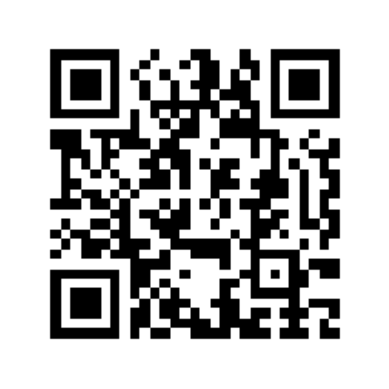

0

In [22]:
helpers.plots.npyplot(watermark_dict['coif17'][0])

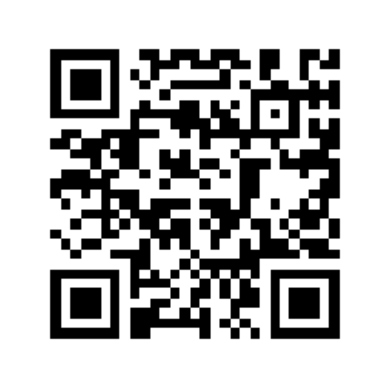

0

In [23]:
helpers.plots.npyplot(np.rot90(watermark_dict['coif17'][0]))

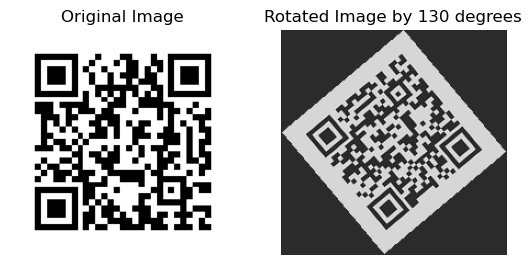

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.ndimage

# Load your QR code image
qr_array = watermark_dict['dmey'][0]

# Rotate the image by 130 degrees using scipy.ndimage
rotated_qr = scipy.ndimage.rotate(qr_array, 130, reshape=True)

# Display the original and rotated images
plt.subplot(1, 2, 1)
plt.imshow(qr_array, cmap='gray')  # Assuming qr_array is a grayscale image
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_qr, cmap='gray')
plt.title('Rotated Image by 130 degrees')
plt.axis('off')

plt.show()

## Implement metrics 

In [8]:
import numpy as np
## SSIM
from skimage.metrics import structural_similarity


In [12]:
psnr_dict= {}
psner_dict_injector= {}
for wavelet in watermarked_data_dict: 
    watermarked_data_reconstructed=  watermarked_data_dict[wavelet][1:208]
    psnr_dict[wavelet] = helpers.metrics.calculate_psnr_skimage(data, watermarked_data_reconstructed)
    psner_dict_injector[wavelet] = helpers.metrics.calculate_psnr_skimage(injector , watermarked_data_dict_injector[wavelet])


In [13]:
psnr_dict

{'bior1.1': nan,
 'bior1.3': nan,
 'bior1.5': nan,
 'bior2.2': nan,
 'bior2.4': nan,
 'bior2.6': nan,
 'bior2.8': nan,
 'bior3.1': nan,
 'bior3.3': nan,
 'bior3.5': nan,
 'bior3.7': nan,
 'bior3.9': nan,
 'bior4.4': nan,
 'bior5.5': nan,
 'bior6.8': nan,
 'coif1': nan,
 'coif2': nan,
 'coif3': nan,
 'coif4': nan,
 'coif5': nan,
 'coif6': nan,
 'coif7': nan,
 'coif8': nan,
 'coif9': nan,
 'coif10': nan,
 'coif11': nan,
 'coif12': nan,
 'coif13': nan,
 'coif14': nan,
 'coif15': nan,
 'coif16': nan,
 'coif17': nan,
 'db1': nan,
 'db2': nan,
 'db3': nan,
 'db4': nan,
 'db5': nan,
 'db6': nan,
 'db7': nan,
 'db8': nan,
 'db9': nan,
 'db10': nan,
 'db11': nan,
 'db12': nan,
 'db13': nan,
 'db14': nan,
 'db15': nan,
 'db16': nan,
 'db17': nan,
 'db18': nan,
 'db19': nan,
 'db20': nan,
 'db21': nan,
 'db22': nan,
 'db23': nan,
 'db24': nan,
 'db25': nan,
 'db26': nan,
 'db27': nan,
 'db28': nan,
 'db29': nan,
 'db30': nan,
 'db31': nan,
 'db32': nan,
 'db33': nan,
 'db34': nan,
 'db35': nan,
 

In [15]:
psner_dict_injector

{'bior1.1': 70.47099978436118,
 'bior1.3': 70.7773600517337,
 'bior1.5': 71.28167706738421,
 'bior2.2': 71.29207083457237,
 'bior2.4': 71.95933960012371,
 'bior2.6': 72.54221969774649,
 'bior2.8': 73.00559011470773,
 'bior3.1': 71.0650481389891,
 'bior3.3': 71.8103907920925,
 'bior3.5': 72.40750325668773,
 'bior3.7': 73.36961564053996,
 'bior3.9': 73.36961564054118,
 'bior4.4': 71.32390260019045,
 'bior5.5': 70.32401935600562,
 'bior6.8': 72.2828258789943,
 'coif1': 70.77736005173404,
 'coif2': 71.28537065353224,
 'coif3': 71.62364047571937,
 'coif4': 71.87390524162868,
 'coif5': 72.13101546738316,
 'coif6': 72.217790693634,
 'coif7': 72.10991352485453,
 'coif8': 71.9488495289315,
 'coif9': 71.75327637335418,
 'coif10': 72.02443807704346,
 'coif11': 71.92981973294492,
 'coif12': 71.89150013102237,
 'coif13': 71.6578373668012,
 'coif14': 71.91940879890677,
 'coif15': 71.78498770251808,
 'coif16': 71.62908947371263,
 'coif17': 71.72382629389955,
 'db1': 70.47099978436118,
 'db2': 70.4979

In [12]:
ssim_dict= {}
for wavelet in watermarked_data_dict: 
    watermarked_data_reconstructed=  watermarked_data_dict[wavelet][1:208]
    ssim_dict[wavelet] = structural_similarity(data, watermarked_data_reconstructed, data_range=data.max() - data.min())

ssim_dict

{'bior1.1': 0.9821000473159277,
 'bior1.3': 0.9821000330661449,
 'bior1.5': 0.9821000417934768,
 'bior2.2': 0.9821000334714087,
 'bior2.4': 0.982100042264202,
 'bior2.6': 0.9821000451483964,
 'bior2.8': 0.9821000419445217,
 'bior3.1': 0.9821000341545558,
 'bior3.3': 0.9821000441580932,
 'bior3.5': 0.9821000389537962,
 'bior3.7': 0.9821000458667408,
 'bior3.9': 0.9821000438684179,
 'bior4.4': 0.982100042195884,
 'bior5.5': 0.9821000393138783,
 'bior6.8': 0.9821000419040389,
 'coif1': 0.9821000334165245,
 'coif2': 0.9821000404857513,
 'coif3': 0.9821000439337905,
 'coif4': 0.982100045098072,
 'coif5': 0.9821000510960189,
 'coif6': 0.9821000586204932,
 'coif7': 0.9821000567807341,
 'coif8': 0.9821000615571917,
 'coif9': 0.9821000645512175,
 'coif10': 0.982100061835301,
 'coif11': 0.9821000603852105,
 'coif12': 0.9821000610413296,
 'coif13': 0.9821000665696227,
 'coif14': 0.9821000702954675,
 'coif15': 0.9821000704184061,
 'coif16': 0.9821000749364818,
 'coif17': 0.9821000755045215,
 'db1'

In [18]:
ssim_dict_injector= {}
for wavelet in watermarked_data_dict_injector: 
    ssim_dict_injector[wavelet] = structural_similarity(injector, watermarked_data_dict_injector[wavelet], data_range=injector.max() - injector.min())

ssim_dict_injector

{'bior1.1': 0.9994629382477298,
 'bior1.3': 0.9995973765469329,
 'bior1.5': 0.9996945630824563,
 'bior2.2': 0.9996054036780169,
 'bior2.4': 0.999705560426633,
 'bior2.6': 0.9997350275461191,
 'bior2.8': 0.9997466867843116,
 'bior3.1': 0.9995317216694639,
 'bior3.3': 0.9996470424516131,
 'bior3.5': 0.999711698582762,
 'bior3.7': 0.9997495381274775,
 'bior3.9': 0.9997495381274791,
 'bior4.4': 0.9996971323626255,
 'bior5.5': 0.9996812444577989,
 'bior6.8': 0.999737678209459,
 'coif1': 0.9995962098783585,
 'coif2': 0.999693627839934,
 'coif3': 0.9997277144872196,
 'coif4': 0.999737106479076,
 'coif5': 0.9997392663338416,
 'coif6': 0.9997315488702475,
 'coif7': 0.9997190155724378,
 'coif8': 0.9996879178105488,
 'coif9': 0.9996762602204526,
 'coif10': 0.9997071258992498,
 'coif11': 0.9996862021407917,
 'coif12': 0.9996810407442808,
 'coif13': 0.9996402897986775,
 'coif14': 0.9996855326623184,
 'coif15': 0.9996545385040438,
 'coif16': 0.9996256510784431,
 'coif17': 0.9996453044517511,
 'db1':

In [13]:
ncc_dict= {}
for wavelet in watermarked_data_dict: 
    watermarked_data_reconstructed=  watermarked_data_dict[wavelet][1:208]
    ncc_dict[wavelet] = np.sum(data * watermarked_data_reconstructed) / (np.linalg.norm(data) * np.linalg.norm(watermarked_data_reconstructed))
ncc_dict



{'bior1.1': 0.9885183290399685,
 'bior1.3': 0.9885183315341854,
 'bior1.5': 0.9885183306750097,
 'bior2.2': 0.988518331568236,
 'bior2.4': 0.9885183307028802,
 'bior2.6': 0.9885183298796761,
 'bior2.8': 0.9885183307852364,
 'bior3.1': 0.9885183319422239,
 'bior3.3': 0.9885183298473452,
 'bior3.5': 0.9885183310703165,
 'bior3.7': 0.9885183299318148,
 'bior3.9': 0.988518330507441,
 'bior4.4': 0.98851833075593,
 'bior5.5': 0.9885183311267445,
 'bior6.8': 0.9885183307926051,
 'coif1': 0.9885183315979387,
 'coif2': 0.9885183309264188,
 'coif3': 0.9885183303135141,
 'coif4': 0.9885183296241433,
 'coif5': 0.9885183286967032,
 'coif6': 0.9885183276741449,
 'coif7': 0.9885183281961425,
 'coif8': 0.9885183273544931,
 'coif9': 0.9885183263735053,
 'coif10': 0.9885183255326437,
 'coif11': 0.9885183249698739,
 'coif12': 0.9885183254806283,
 'coif13': 0.9885183245396026,
 'coif14': 0.9885183236557428,
 'coif15': 0.9885183229358111,
 'coif16': 0.9885183223327539,
 'coif17': 0.9885183223025934,
 'db1'

### PCNR 

In [12]:
def scale_3d_array_to_0_255(arr):
    # Normalize the array to have values between 0 and 1
    arr_min = arr.min()
    arr_max = arr.max()
    normalized_arr = (arr - arr_min) / (arr_max - arr_min)

    # Scale to 0-255, keeping the values as floating point numbers
    scaled_arr = normalized_arr * 255
    return scaled_arr

scaled_data= scale_3d_array_to_0_255(data)
scaled_injector=scale_3d_array_to_0_255(injector)

In [13]:
# Calculate PCNR
pcnr_dict={}

for wavelet in watermarked_data_dict: 
    watermarked_data_reconstructed=  scale_3d_array_to_0_255(watermarked_data_dict[wavelet][1:208])
    # Calculate PCNR
    correlation = np.sum(scaled_data * watermarked_data_reconstructed)
    max_correlation = np.max(correlation)
    noise = watermarked_data_reconstructed - scaled_data
    noise_magnitude = np.linalg.norm(noise)
    pcnr_dict[wavelet] = max_correlation / noise_magnitude
    
pcnr_dict



{'bior1.1': 414884.7616725276,
 'bior1.3': 414884.7138905923,
 'bior1.5': 414884.751484439,
 'bior2.2': 414884.7228332437,
 'bior2.4': 414884.75999576744,
 'bior2.6': 414884.7584253143,
 'bior2.8': 414884.70205063676,
 'bior3.1': 414884.73367062386,
 'bior3.3': 414884.7164333762,
 'bior3.5': 414884.6904172704,
 'bior3.7': 414884.7245068738,
 'bior3.9': 414884.7361948707,
 'bior4.4': 414885.2778149451,
 'bior5.5': 414885.75031138357,
 'bior6.8': 414885.212040029,
 'coif1': 414885.31286639255,
 'coif2': 414885.1309974263,
 'coif3': 414885.2931403967,
 'coif4': 414884.9962869685,
 'coif5': 414885.1123981979,
 'coif6': 414885.1274365191,
 'coif7': 414885.1785015936,
 'coif8': 414885.198878644,
 'coif9': 414885.3185809399,
 'coif10': 414885.2626007994,
 'coif11': 414885.2669473831,
 'coif12': 414885.664295528,
 'coif13': 414885.58554105944,
 'coif14': 414885.68394276925,
 'coif15': 414885.3380227498,
 'coif16': 414885.36529684917,
 'coif17': 414885.3093308312,
 'db1': 414884.7616725276,
 'd

In [14]:
# Calculate PCNR
pcnr_dict_injector={}

for wavelet in watermarked_data_dict_injector: 
    watermarked_data_reconstructed=  scale_3d_array_to_0_255(watermarked_data_dict_injector[wavelet])
    # Calculate PCNR
    correlation = np.sum(scaled_injector * watermarked_data_reconstructed)
    max_correlation = np.max(correlation)
    noise = watermarked_data_reconstructed - scaled_injector
    noise_magnitude = np.linalg.norm(noise)
    pcnr_dict_injector[wavelet] = max_correlation / noise_magnitude
    
pcnr_dict_injector


{'bior1.1': 25457456.721148998,
 'bior1.3': 26514754.17624183,
 'bior1.5': 28091604.141068883,
 'bior2.2': 28205453.066191807,
 'bior2.4': 30490058.44919121,
 'bior2.6': 32712264.140561864,
 'bior2.8': 35503556.063747995,
 'bior3.1': 27714997.37805421,
 'bior3.3': 29945907.994558502,
 'bior3.5': 32536351.256760918,
 'bior3.7': 36688437.166126266,
 'bior3.9': 36688437.166121334,
 'bior4.4': 20763715.583309766,
 'bior5.5': 14477251.94088667,
 'bior6.8': 21715034.432613745,
 'coif1': 17506543.72402429,
 'coif2': 19300550.681642823,
 'coif3': 19872189.517334703,
 'coif4': 20122261.35241053,
 'coif5': 18884626.081349168,
 'coif6': 18821477.161970846,
 'coif7': 17301195.180088397,
 'coif8': 17061076.923217602,
 'coif9': 16541441.066330632,
 'coif10': 16589842.896112245,
 'coif11': 17202026.135825943,
 'coif12': 17174948.187935237,
 'coif13': 16758382.42508811,
 'coif14': 18108735.089956548,
 'coif15': 18399565.411653165,
 'coif16': 18122803.81643969,
 'coif17': 18179204.97969571,
 'db1': 254

# Common Attacks

## Noise addition

In [ ]:
wavelist= ['bior1.1',
 'bior1.3',
 'bior6.8',
 'coif1',
 'coif17',
  'db2',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio3.7',
 'sym2',
 'sym20']

In [13]:
def add_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise


In [16]:
watermarked_coeffs_dict_attacked_noise={}
watermarked_coeffs_dict_injector_attacked_noise={}

for wavelet in wavelist: 
    watermarked_coeffs_dict_attacked_noise[wavelet] =watermarked_coeffs_dict[wavelet]
    ## Adding the noise on approximation coefficients level
    watermarked_coeffs_dict_attacked_noise[wavelet]['aaa'] =add_noise(watermarked_coeffs_dict[wavelet]['aaa'])
    
    # rinse et repeat for the injector
    watermarked_coeffs_dict_injector_attacked_noise[wavelet]=watermarked_coeffs_dict_injector[wavelet]
    watermarked_coeffs_dict_injector_attacked_noise[wavelet]['aaa'] =add_noise(watermarked_coeffs_dict_injector[wavelet]['aaa'])

In [17]:
#retrieving wm for the piston
watermark_dict_attacked_noise ={} 

for wavelet in wavelist: 
    watermark_dict_attacked_noise[wavelet] =helpers.wm.retrieveWm(data, watermarked_coeffs_dict_attacked_noise[wavelet], wavelet, alpha_value) 

In [18]:
#retrieving wm for the injector 
watermark_dict_injector_attacked_noise ={} 

for wavelet in wavelist: 
    watermark_dict_injector_attacked_noise[wavelet] =helpers.wm.retrieveWm(injector, watermarked_coeffs_dict_injector_attacked_noise[wavelet], wavelet, alpha_value) 

In [19]:
avg_watermark_dict_attacked_noise ={} 
avg_watermark_dict_injector_attacked_noise ={} 
for wavelet in wavelist: 
    avg_watermark_dict_attacked_noise[wavelet] =helpers.wm.recreate2Dwm(watermark_dict_attacked_noise[wavelet]) 
    avg_watermark_dict_injector_attacked_noise[wavelet] =helpers.wm.recreate2Dwm(watermark_dict_injector_attacked_noise[wavelet])     

In [51]:
from scipy.ndimage import zoom

# Desired new size (smaller)
new_size = (153, 153)  # Change this to the desired smaller size

# Resize the QR code array using scipy.ndimage.zoom()
watermark_piston = zoom(watermark, (new_size[0] / watermark.shape[0], new_size[1] / watermark.shape[1]), order=0)


In [29]:
from scipy.ndimage import zoom

# Desired new size (smaller)
new_size = (31,31)  # Change this to the desired smaller size

# Resize the QR code array using scipy.ndimage.zoom()
watermark_injector = zoom(watermark, (new_size[0] / watermark.shape[0], new_size[1] / watermark.shape[1]), order=0)

In [32]:
watermark_piston.shape, watermark_injector.shape

((117, 117), (31, 31))

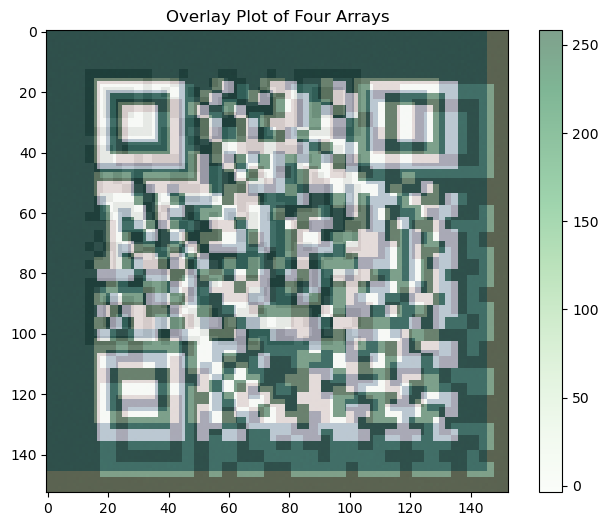

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Example 2D arrays
ref_array = watermark_piston  # Reference array
array1 = avg_watermark_dict_attacked_noise["coif17"]     # Array 1
array2 = avg_watermark_dict_attacked_noise["dmey"]   # Array 2
array3 = avg_watermark_dict_attacked_noise["db38"]

# Plotting
plt.figure(figsize=(8, 6))

# Reference array
plt.imshow(ref_array, cmap='gray', alpha=0.5)
# Overlay arrays
plt.imshow(array1, cmap='Reds', alpha=0.5)
plt.imshow(array2, cmap='Blues', alpha=0.5)
plt.imshow(array3, cmap='Greens', alpha=0.5)

plt.title('Overlay Plot of Four Arrays')
plt.colorbar()
plt.show()

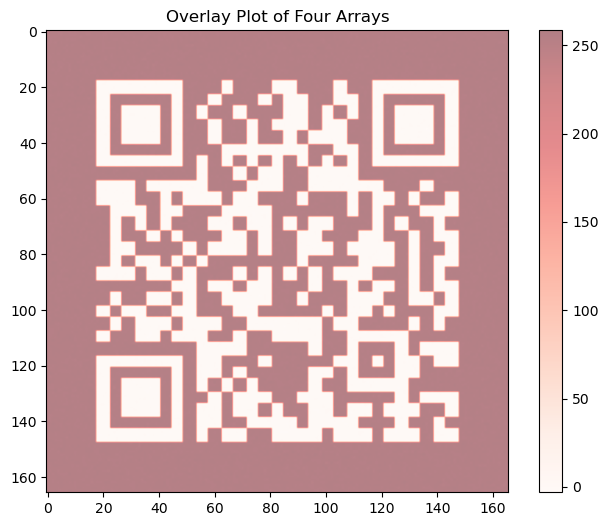

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Example 2D arrays
array1 = avg_watermark_dict_attacked_noise["coif17"]     # Array 1
array2 = avg_watermark_dict_attacked_noise["dmey"]   # Array 2
array3 = avg_watermark_dict_attacked_noise["db38"]

# Plotting
plt.figure(figsize=(8, 6))

# Reference array
# Overlay arrays
plt.imshow(array1, cmap='Reds', alpha=0.5)


plt.title('Overlay Plot of Four Arrays')
plt.colorbar()
plt.show()

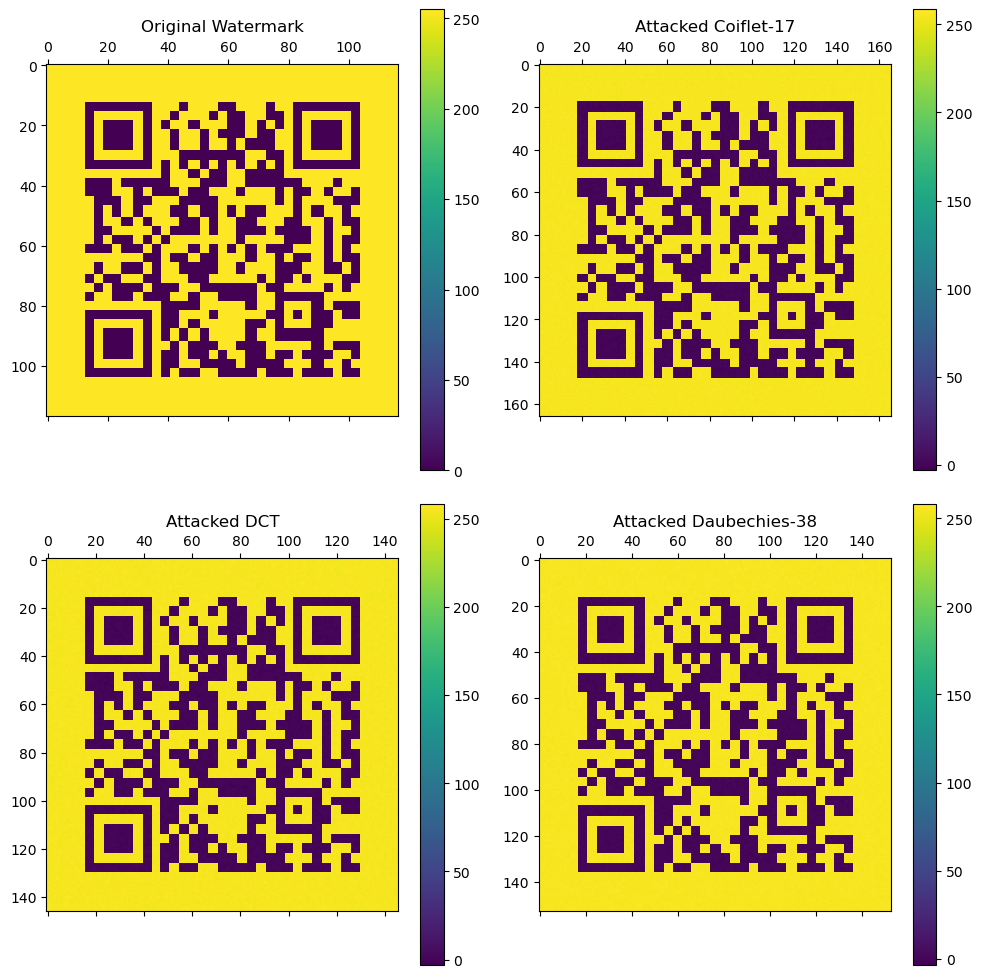

In [47]:

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plotting each array
cax1 = axs[0, 0].matshow(ref_array, cmap='viridis')
fig.colorbar(cax1, ax=axs[0, 0])
axs[0, 0].set_title('Original Watermark')

cax2 = axs[0, 1].matshow(array1, cmap='viridis')
fig.colorbar(cax2, ax=axs[0, 1])
axs[0, 1].set_title('Attacked Coiflet-17')

cax3 = axs[1, 0].matshow(array2, cmap='viridis')
fig.colorbar(cax3, ax=axs[1, 0])
axs[1, 0].set_title('Attacked DCT')

cax4 = axs[1, 1].matshow(array3, cmap='viridis')
fig.colorbar(cax4, ax=axs[1, 1])
axs[1, 1].set_title('Attacked Daubechies-38')

# Fine-tuning layout
plt.tight_layout()

plt.savefig('attacked_noise.png')

# Show the plot
plt.show()

In [25]:
avg_watermark_dict_injector_attacked_noise["db2"].shape

(31, 31)

In [26]:
avg_watermark_dict_attacked_noise["db2"].shape

(117, 117)

In [53]:
psnr_dict_wm["db38"] = helpers.metrics.calculate_psnr_skimage(watermark_piston, avg_watermark_dict_attacked_noise["db38"])


In [76]:
from scipy.ndimage import zoom
def resize_wm(watermark, new_size):
    # Desired new size (smaller)
    # Resize the QR code array using scipy.ndimage.zoom()
    watermark = zoom(watermark, (new_size[0] / watermark.shape[0], new_size[1] / watermark.shape[1]), order=0)
    return watermark

In [78]:
psnr_dict_wm= {}
psnr_dict_wm_injector= {}
for wavelet in wavelist: 

    wm_piston=  resize_wm(watermark,avg_watermark_dict_attacked_noise[wavelet].shape)
    wm_injector= resize_wm(watermark,avg_watermark_dict_injector_attacked_noise[wavelet].shape)
    psnr_dict_wm[wavelet] = helpers.metrics.calculate_psnr_skimage(wm_piston, avg_watermark_dict_attacked_noise[wavelet])
    psnr_dict_wm_injector[wavelet] = helpers.metrics.calculate_psnr_skimage(wm_injector , avg_watermark_dict_injector_attacked_noise[wavelet])

In [75]:
watermark_piston= resize_wm(watermark, avg_watermark_dict_attacked_noise["db38"].shape)
watermark_piston.shape

(166, 166)

In [68]:
watermark_piston= resize_wm(watermark, avg_watermark_dict_attacked_noise["coif17"].shape)
psnr_dict_wm["coif17"] = helpers.metrics.calculate_psnr_skimage(watermark_piston, avg_watermark_dict_attacked_noise["coif17"])


In [79]:
psnr_dict_wm

{'bior1.1': 48.3555837880658,
 'bior1.3': 48.36073104867411,
 'bior6.8': 48.61669120171741,
 'coif1': 48.3764629093866,
 'coif17': 50.001946113625245,
 'db2': 48.30985635445298,
 'db37': 49.57295204639511,
 'db38': 49.5979053229463,
 'dmey': 49.40953911327892,
 'haar': 48.32103478386122,
 'rbio1.1': 48.306015619633094,
 'rbio3.7': 48.65447861417184,
 'sym2': 48.33550856765089,
 'sym20': 49.05518096131678}

In [81]:
psnr_dict_wm_injector

{'bior1.1': 43.16973442028706,
 'bior1.3': 43.4173758542037,
 'bior6.8': 43.85005761530902,
 'coif1': 43.19244195126557,
 'coif17': 47.15326890612528,
 'db2': 42.83978672586301,
 'db37': 46.31195726872257,
 'db38': 46.49309713868703,
 'dmey': 45.87085832894179,
 'haar': 42.85565843827467,
 'rbio1.1': 43.063439659958156,
 'rbio3.7': 44.15302736929931,
 'sym2': 43.05282248217917,
 'sym20': 45.0834412182019}

In [72]:
avg_watermark_dict_attacked_noise["coif17"].shape
avg_watermark_dict_attacked_noise["db38"].shape

(153, 153)

### Rotation attack

In [ ]:
from scipy import ndimage
import numpy as np

# Assuming `array` is your input NumPy array (image)
rotated_array = 
data = ndimage.rotate(data, 130, reshape=False)


### Quantization attack

In [ ]:
def quantize_data(data, quantization_level):
    return np.round(data / quantization_level) * quantization_level

# Example usage
# quantization_level = 0.1  # Example quantization level
# quantized_data = quantize_data(data, quantization_level)